### **Car Sales Data Analysis - Project 1**

Esteban Missura

#### Question 1: 
Analyzing Regional Patterns: Do certain regions have unique patterns for used car sales 
1. certain makes being more common in certain regions (answered by visuals 3 and 5 for presentation, and supplemental 1 - which are parts 5, 9, and 6 respectively below)
2. certain regions having higher/lower prices (answered by visual 1 for the presentation - which is part 2 below)
3. what correlations are there and what region offers the most bang for your buck vs the worst deals? (answered by visuals 2 and 4 for presentation, supplemental 2, and table 1 for presentation - which are parts 3, 7, 8, and 4 respectively)

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

In [2]:
# read in our finalized and clean dataset
car_df = pd.read_csv('final_clean_car_data.csv')
car_df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,kia,sorento,suv,automatic,ca,5.0,16639.0,white,black,20500,21500,2014
1,2015,kia,sorento,suv,automatic,ca,5.0,9393.0,white,beige,20800,21500,2014
2,2014,bmw,3 series,sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,2015
3,2015,volvo,s60,sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,2015
4,2015,nissan,altima,sedan,automatic,ca,1.0,5554.0,gray,black,15350,10900,2014


In [3]:
# further cleaning of the data, specifically narrowing down car body types
car_df.loc[car_df['body'].str.contains('cab|supercrew'), 'body'] = 'pickup'
car_df.loc[car_df['body'].str.contains('van'), 'body'] = 'van'
car_df.loc[car_df['body'].str.contains('sedan'), 'body'] = 'sedan'
car_df.loc[car_df['body'].str.contains('coupe|koup'), 'body'] = 'coupe'
car_df.loc[car_df['body'].str.contains('convertible'), 'body'] = 'convertible'
car_df.loc[car_df['body'].str.contains('wagon'), 'body'] = 'wagon'
car_df['body'].value_counts()

body
sedan          211452
suv            112840
pickup          36308
van             25686
hatchback       23508
coupe           16537
wagon           14016
convertible      8637
Name: count, dtype: int64

In [4]:
# statistical analysis of the data
car_df.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,448984.000000,448984.000000,448984.000000,448984.000000,448984.000000,448984.000000
mean,2010.264161,3.422718,64611.005377,13083.466616,12916.083293,2014.922293
std,3.700003,0.931266,45433.162194,7480.225566,7547.955768,0.267710
min,1990.000000,1.000000,1.000000,25.000000,1.000000,2014.000000
25%,2008.000000,2.700000,28790.000000,7600.000000,7300.000000,2015.000000
50%,2012.000000,3.600000,51551.500000,12200.000000,12100.000000,2015.000000
75%,2013.000000,4.200000,95135.250000,17700.000000,17600.000000,2015.000000
max,2015.000000,5.000000,199249.000000,110000.000000,34500.000000,2015.000000


In [5]:
# counts of total car makes in the dataset
car_df['make'].value_counts()

make
ford             77908
chevrolet        51112
nissan           43473
toyota           33861
dodge            26646
honda            23588
hyundai          18463
kia              15715
chrysler         14959
bmw              14379
infiniti         13398
jeep             12336
mercedes-benz    12146
volkswagen       10673
lexus             9376
gmc               8427
mazda             6850
cadillac          5795
lincoln           4676
buick             4376
subaru            4297
acura             4204
audi              4049
pontiac           3870
mitsubishi        3565
ram               3410
volvo             2993
mini              2943
saturn            2480
scion             1530
mercury           1517
jaguar            1005
suzuki             965
hummer             747
land rover         726
fiat               725
porsche            517
saab               408
smart              343
oldsmobile         290
isuzu              163
maserati            50
plymouth            15
geo   

1. Quick analysis and graph

<Axes: xlabel='state'>

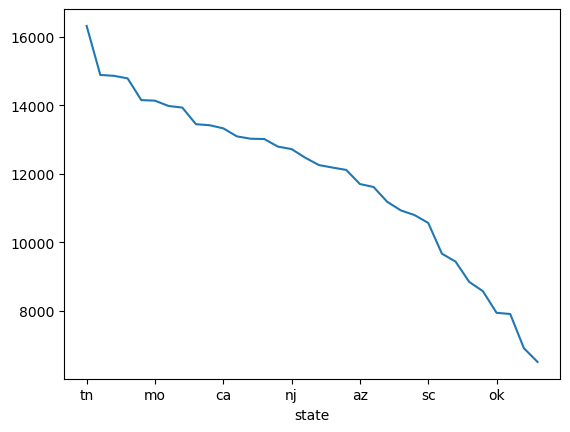

In [6]:
# small analysis chart to view average selling prices accross some of the states
car_df.groupby('state')['sellingprice'].mean().sort_values(ascending=False).plot()

2. Average Selling Prices by State (1st visual for presentation)

In [7]:
# new dataframe with the selling price averages by state
prices_df = car_df['sellingprice'].groupby([car_df['state']]).mean().reset_index()
prices_df['state'] = prices_df['state'].str.upper()
prices_df['sellingprice'] = prices_df['sellingprice'].round(2)
prices_df.head()

,state,sellingprice
0,AL,9440.00
1,AZ,11702.61
2,CA,13327.41
3,CO,14884.75
4,FL,13447.85


In [8]:
# Plotting the selling price average by state heatmap
fig = px.choropleth(prices_df, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='sellingprice', 
                    color_continuous_scale='Blues', 
                    scope='usa',
                    labels={'sellingprice':'Average Selling Price'},
                    title='Average Selling Prices by State',
                    hover_data={'sellingprice': ':.2f'})

# Update the hover template to show the formatted currency
fig.update_traces(hovertemplate='<b>%{location}</b><br>Average Selling Price: $%{z:,}')

fig.update_layout(coloraxis_colorbar=dict(
    title="Average Selling Price",
    tickformat="$.0f"))  # Format color bar

# Show the plot
fig.show()

3. Average Car Make Year by State (2nd visual for presentation)

In [9]:
# new dataframe with the car make year averages by state
year_df = car_df['year'].groupby([car_df['state']]).mean().reset_index()
year_df['state'] = year_df['state'].str.upper()
year_df['year'] = year_df['year'].round(0)
year_df.tail()

,state,year
29,TX,2010.0
30,UT,2009.0
31,VA,2008.0
32,WA,2010.0
33,WI,2010.0


In [10]:
# Plotting the car year average by state heatmap
fig2 = px.choropleth(year_df, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='year', 
                    color_continuous_scale='Reds', 
                    scope='usa',
                    labels={'year':'Average Car Year'},
                    title='Average Car Year by State')

# Show the plot
fig2.show()

4. Correlation Matrix (1st table for presentation)

In [11]:
# analyzing the overall correlation between selling price, year, condition, odometer, and mmr
car_df[['sellingprice', 'year', 'condition', 'odometer', 'mmr']].corr().round(2)

,sellingprice,year,condition,odometer,mmr
sellingprice,1.00,0.64,0.57,-0.65,0.98
year,0.64,1.00,0.53,-0.79,0.65
condition,0.57,0.53,1.00,-0.53,0.50
odometer,-0.65,-0.79,-0.53,1.00,-0.65
mmr,0.98,0.65,0.50,-0.65,1.00


5. Car Make Purchase Probability by State Heatmap (3rd visual for presentation)

In [12]:
# reading in the csv again to do different analysis
df = pd.read_csv('final_clean_car_data.csv')

# trim dataset to just makes in the top 25 selling makes
top25_makes = sorted(list(df['make'].value_counts()[:25].index))
df = df[df['make'].isin(top25_makes)]

# trim dataset to just makes in the top 25 selling states
top25_states = sorted(list(df['state'].value_counts()[:25].index))
df = df[df['state'].isin(top25_states)]

In [13]:
# national marketshare: The used car sales for each make as a percentage of all used car sales
national_marketshare = df['make'].value_counts() / df['make'].count()
national_marketshare

make
ford             0.181523
chevrolet        0.118829
nissan           0.101825
toyota           0.078440
dodge            0.062078
honda            0.055619
hyundai          0.043162
kia              0.036653
chrysler         0.035094
bmw              0.034051
infiniti         0.031789
jeep             0.028814
mercedes-benz    0.028659
volkswagen       0.024950
lexus            0.022246
gmc              0.019484
mazda            0.015730
cadillac         0.013643
lincoln          0.011056
buick            0.010249
subaru           0.010092
acura            0.009824
audi             0.009579
pontiac          0.009001
mitsubishi       0.007609
Name: count, dtype: float64

In [14]:
# function to calculate the percentage difference for each brand in each state compared to the national marketshare
# for example: Subaru sells __% more in Washington than the national average.
def marketshare(srs):
    global national_marketshare
    ms = srs.value_counts() / srs.count()
    diff = (ms - national_marketshare) / national_marketshare
    return diff

In [15]:
# applying the function for every state and putting the results (series) in a list
serieses = []
for state in top25_states:
    serieses.append(marketshare(df[df['state']==state]['make']))

# concatenates all the results together into a 25x25 table
marketsharedf = pd.concat(serieses, axis=1)
marketsharedf.columns = top25_states

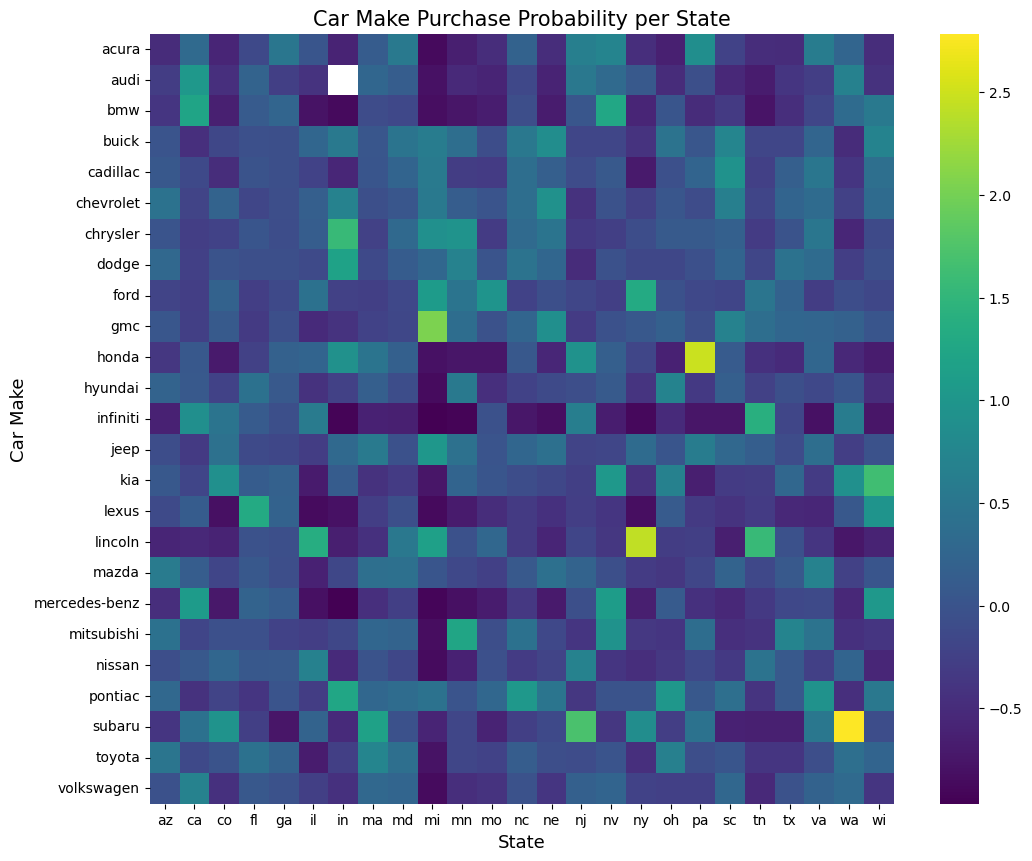

In [16]:
# plots the heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(marketsharedf, cmap='viridis')

# add title and labels
ax.set_title('Car Make Purchase Probability per State', fontsize=15)
ax.set_xlabel('State', fontsize=13)
ax.set_ylabel('Car Make', fontsize=13)

# show plot
plt.show()

6. Car Body Type Purchase Probability by State Heatmap (supplemental 1)

In [17]:
# trim dataset to just makes in the top 25 selling bodies
top4_bodies = sorted(list(car_df['body'].value_counts()[:4].index))
df = car_df[car_df['body'].isin(top4_bodies)]

# trim dataset to just makes in the top 25 selling states
top25_states = sorted(list(car_df['state'].value_counts()[:25].index))
df = car_df[car_df['state'].isin(top25_states)]

In [18]:
# national marketshare: The used car sales for each make as a percentage of all used car sales
national_marketshare = df['body'].value_counts() / df['body'].count()
national_marketshare

body
sedan          0.471702
suv            0.252030
pickup         0.079441
van            0.057270
hatchback      0.051785
coupe          0.037077
wagon          0.031231
convertible    0.019464
Name: count, dtype: float64

In [19]:
# applying the function for every state and putting the results (series) in a list
serieses = []
for state in top25_states:
    serieses.append(marketshare(df[df['state']==state]['body']))

# concatenates all the results together into a 25x25 table
marketsharedf = pd.concat(serieses, axis=1)
marketsharedf.columns = top25_states
marketsharedf.rows = top4_bodies

C:\Users\esteb\AppData\Local\Temp\ipykernel_17596\3410573067.py:9: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



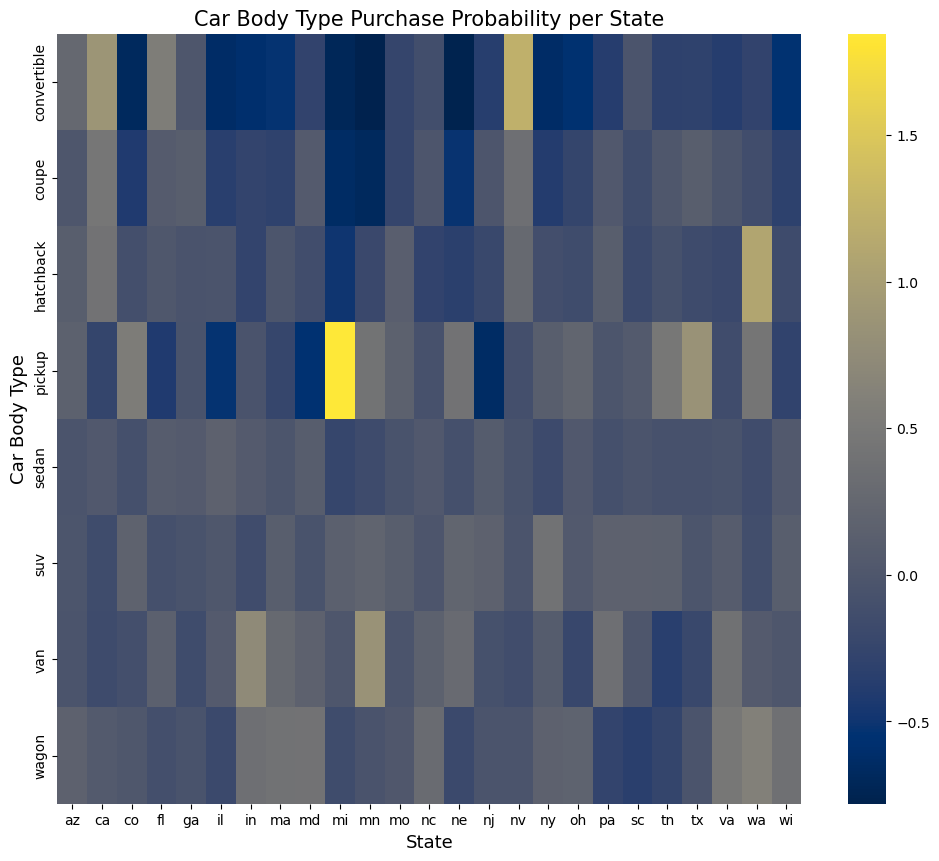

In [20]:
# plots the heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(marketsharedf, cmap='cividis')

# add title and labels
ax.set_title('Car Body Type Purchase Probability per State', fontsize=15)
ax.set_xlabel('State', fontsize=13)
ax.set_ylabel('Car Body Type', fontsize=13)

# show plot
plt.show()

7. Comparing Average Selling Price by Car Condition by State line graph (4th visual for presentation)

In [21]:
# grouping the dataframe by selling price and condition
car_df.groupby('state')[['sellingprice', 'condition']].mean().head()

,sellingprice,condition
state,,
al,9440.000000,2.832000
az,11702.606036,3.123858
ca,13327.414686,3.368029
co,14884.746363,3.546982
fl,13447.851704,3.462778


C:\Users\esteb\AppData\Local\Temp\ipykernel_17596\2024792168.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



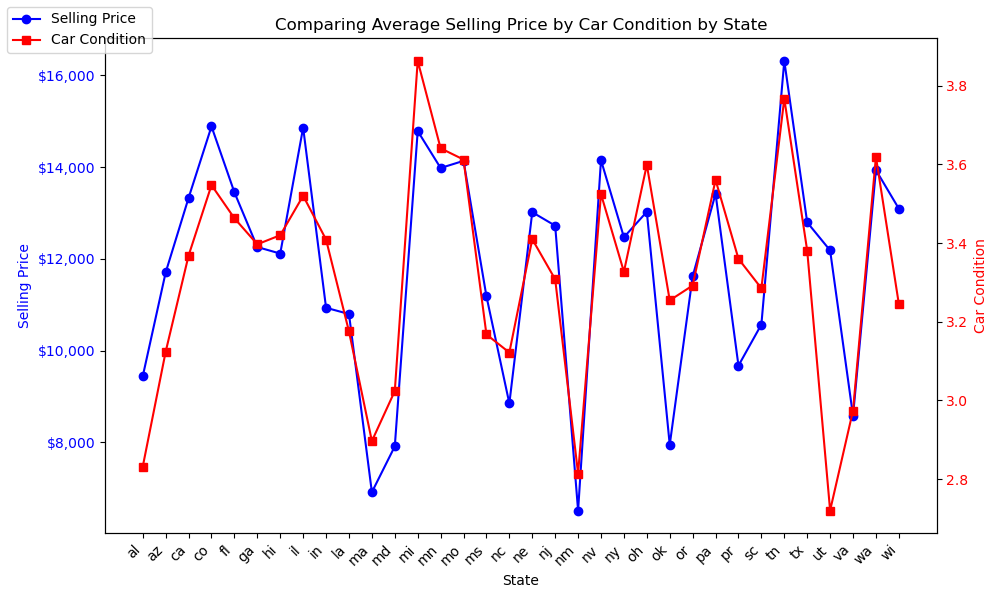

In [22]:
# calculate averages by state
averages = car_df.groupby('state')[['sellingprice', 'condition']].mean()

# plotting dual y-axis line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot for column1 on primary y-axis
ax1.plot(averages.index, averages['sellingprice'], color='b', marker='o', label='Selling Price')
ax1.set_xlabel('State')
ax1.set_ylabel('Selling Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(averages.index, rotation=45, ha='right')

# create a secondary y-axis
ax2 = ax1.twinx()

# plot for column2 on secondary y-axis
ax2.plot(averages.index, averages['condition'], color='r', marker='s', label='Car Condition')
ax2.set_ylabel('Car Condition', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# format y-axis labels for ax1 with dollar sign
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax1.yaxis.set_major_formatter(formatter)

# title and legend
plt.title('Comparing Average Selling Price by Car Condition by State')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()

8. Comparing Average Selling Price by Average Odometer Reading by State line graph (supplemental 2)

C:\Users\esteb\AppData\Local\Temp\ipykernel_17596\850625708.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



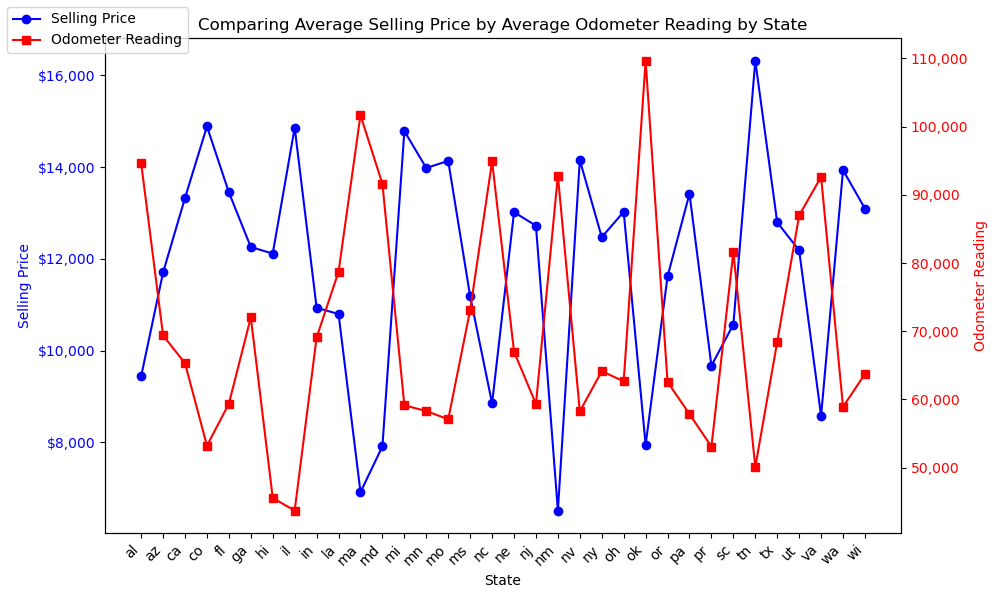

In [23]:
# calculate averages by state
averages = car_df.groupby('state')[['sellingprice', 'odometer']].mean()

# plotting dual y-axis line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot for column1 on primary y-axis
ax1.plot(averages.index, averages['sellingprice'], color='b', marker='o', label='Selling Price')
ax1.set_xlabel('State')
ax1.set_ylabel('Selling Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(averages.index, rotation=45, ha='right')

# create a secondary y-axis
ax2 = ax1.twinx()

# plot for column2 on secondary y-axis
ax2.plot(averages.index, averages['odometer'], color='r', marker='s', label='Odometer Reading')
ax2.set_ylabel('Odometer Reading', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# format y-axis labels for ax1 with dollar sign
formatter = FuncFormatter(lambda x, _: '${:,.0f}'.format(x))
ax1.yaxis.set_major_formatter(formatter)

# format y-axis labels for ax2 with thousands separator
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
ax2.yaxis.set_major_formatter(formatter)

# title and legend
plt.title('Comparing Average Selling Price by Average Odometer Reading by State')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()

9. Car Body Type Counts per Region stacked bar graph (5th visual for presentation)

In [24]:
# mapping all the states to 4 regions in the US
state_to_region = {
    'al': 'south',
    'az': 'west',
    'ca': 'west',
    'co': 'west',
    'fl': 'south',
    'ga': 'south',
    'hi': 'west',
    'il': 'midwest',
    'in': 'midwest',
    'la': 'south',
    'ma': 'northeast',
    'md': 'northeast',
    'mi': 'midwest',
    'mn': 'midwest',
    'mo': 'midwest',
    'ms': 'south',
    'nc': 'south',
    'ne': 'midwest',
    'nj': 'northeast',
    'nm': 'west',
    'nv': 'west',
    'ny': 'northeast',
    'oh': 'midwest',
    'ok': 'south',
    'or': 'west',
    'pa': 'northeast',
    'pr': 'south',
    'sc': 'south',
    'tn': 'south',
    'tx': 'south',
    'ut': 'west',
    'va': 'south',
    'wa': 'west',
    'wi': 'midwest'
}

car_df['region'] = car_df['state'].map(state_to_region)

In [25]:
# print the head of the dataframe to observe the new column
car_df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,region
0,2015,kia,sorento,suv,automatic,ca,5.0,16639.0,white,black,20500,21500,2014,west
1,2015,kia,sorento,suv,automatic,ca,5.0,9393.0,white,beige,20800,21500,2014,west
2,2014,bmw,3 series,sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,2015,west
3,2015,volvo,s60,sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,2015,west
4,2015,nissan,altima,sedan,automatic,ca,1.0,5554.0,gray,black,15350,10900,2014,west


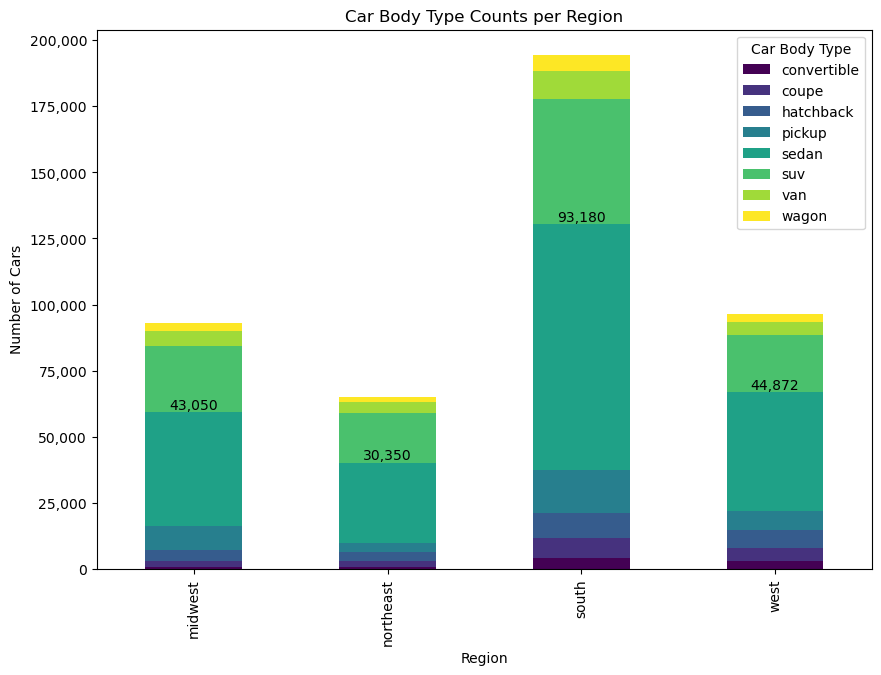

In [26]:
# group by Region and Car Body Type, then count the occurrences
grouped_df = car_df.groupby(['region', 'body']).size().unstack(fill_value=0)

# plot the data
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='viridis')

# ddd title and labels
plt.title('Car Body Type Counts per Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars')
plt.legend(title='Car Body Type')

# function to format the y-axis labels with commas
def thousands_formatter(x, pos):
    return f'{int(x):,}'

ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# annotate the section with the most counts per region
for region in grouped_df.index:
    max_value = grouped_df.loc[region].max()
    max_body_type = grouped_df.loc[region].idxmax()
    height = grouped_df.loc[region].cumsum()[max_body_type]
    ax.text(grouped_df.index.get_loc(region), height, f'{max_value:,}', ha='center', va='bottom')

# show plot
plt.show()